# Basic ingredients of cloud computing

## Jupyter notebook / Jupyterlab

This is where you are right now !

You can replace lab by tree to see the notebook interface instead of the lab one

Documentation and try online : https://docs.jupyter.org/en/latest/index.html

## Xarray

How to handle multi dimensional data

DataArray : dictionary-like containers of multiple arrays with multiple dimensions

You have data and metadata, coordinates for instance

Documentation and tutorial : https://tutorial.xarray.dev/intro.html

In [1]:
import xarray as xr

In [2]:
# Let's open a dataset that is sitting on the cloud
store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/cmip6-feedstock/CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.zos.gn.v20190429.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    zos                 (time, j, i) float32 dask.array<chunksize=(360, 291, 360), meta=np.ndarray>
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/99be0cf0-54b1-405b-b46c-e69c274...
    variable_id:                 zos
    variant_label:               r1i1p1f1
    version:                     v20190429

In [3]:
# Total size of the dataset
ds.nbytes/1e9

0.838130124

In [4]:
# We extract one variable
ds['zos']

<xarray.DataArray 'zos' (time: 1980, j: 291, i: 360)>
dask.array<open_dataset-acf05d6877df471e3e237f134268820fzos, shape=(1980, 291, 360), dtype=float32, chunksize=(360, 291, 360), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    latitude   (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude  (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        zos is obtained directly from the free-surface model., CM...
    history:        sub_timeseries
    long_name:      Sea Surface Height Above Geoid
    original_name:  sossheig
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [5]:
# What is the value at a particular location
ds['zos'][0,100,100].values

array(0.51401323, dtype=float32)

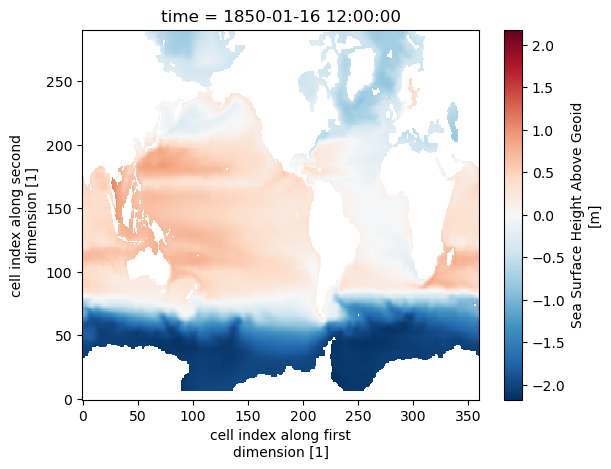

In [6]:
# We plot a map at one date
ds['zos'].isel(time=0).plot()

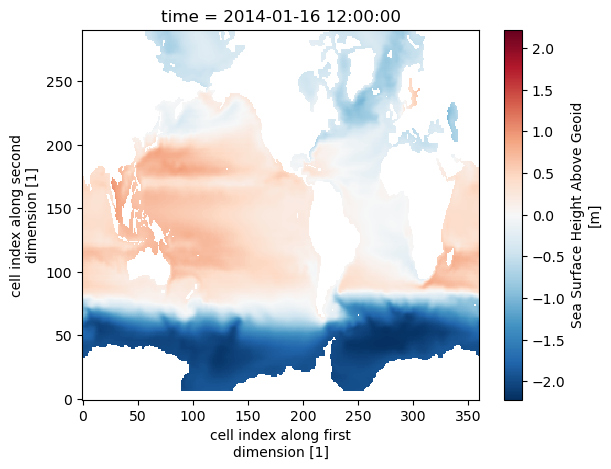

In [7]:
# We plot a map at one date
ds['zos'].sel(time="2014-01-16").plot()

ImportError: Plotting of arrays of cftime.datetime objects or arrays indexed by cftime.datetime objects requires the optional `nc-time-axis` (v1.2.0 or later) package.

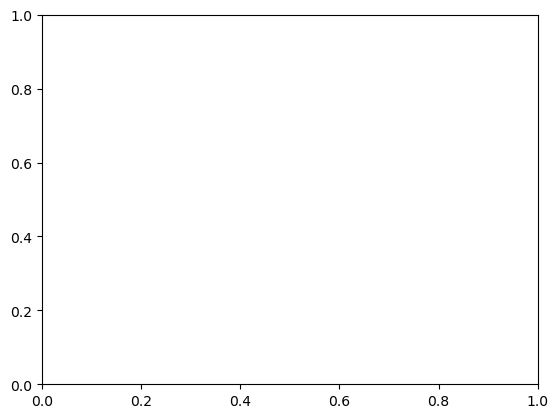

In [8]:
# A time serie at one location
ds['zos'][:,100,100].plot()

In [ ]:
# The dataset is so small we can compute means without parallel computation
ds['zos'].mean(dim='time').plot()

## Intake

A package to organize, disseminate datasets.

Widely used on the cloud to handle catalogs of data.

Documentation : https://intake.readthedocs.io/en/latest/

In [9]:
from intake import open_catalog

Pangeo's online catalog https://catalog.pangeo.io/

In [10]:
# We can explore it both online and in the command line
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
list(cat)

['ocean', 'atmosphere', 'climate', 'hydro']

In [11]:
# One level down
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
list(cat)

['sea_surface_height',
 'cesm_mom6_example',
 'ECCOv4r3',
 'SOSE',
 'GODAS',
 'ECCO_layers',
 'altimetry',
 'LLC4320',
 'GFDL_CM2_6',
 'CESM_POP',
 'channel',
 'MEOM_NEMO']

In [14]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-cmems-duacs/o/.zmetadata?alt=media
User project specified in the request is invalid.

In [13]:
# Now we open one dataset
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-cmems-duacs/o/.zmetadata?alt=media
User project specified in the request is invalid.

In [ ]:
# Total size of the dataset
ds.nbytes/1e9

We don't have this much memory, this time we need parallel computing

In [15]:

from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
print(list(cat))
ds = cat['j3'].to_dask()
ds

['al', 'alg', 'c2', 'e1', 'e1g', 'e2', 'en', 'enn', 'g2', 'h2', 'j1', 'j1g', 'j1n', 'j2', 'j2g', 'j2n', 'j3', 's3a', 's3b', 'tp', 'tpn']


ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-cnes/o/alti%2Fj3%2F.zmetadata?alt=media
User project specified in the request is invalid.

## Dask

Parallel computing in python with task scheduling on workers

Allows computation to scale from laptop to HPC, cloud

Documentation : https://docs.dask.org/en/stable/

Click on the Dask tab on the left side of jupyterlab, then +NEW

A LocalCluster has been launched, drag and drop it to the notebook below, it should look like this :

Select some dashboard metrics to follow : Progress, Task Stream, Graph, CPU and Cluster Memory, and rearrange the lab windows

In [ ]:
# One variable size
ds.sla.nbytes/1e9

In [ ]:
# We only have 15Gb available but we can still handle this variable
sla_timeseries = ds.sla.mean(dim=('latitude', 'longitude'))

In [ ]:
# Nothing is happenning while we do not load the computation
sla_timeseries.load()

In [ ]:
# Let's make a plot

import matplotlib.pyplot as plt
sla_timeseries.plot(label='full data')
sla_timeseries.rolling(time=365, center=True).mean().plot(label='rolling annual mean')
plt.ylabel('Sea Level Anomaly [m]')
plt.title('Global Mean Sea Level')
plt.legend()
plt.grid()

In [16]:
import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/cmip6-feedstock/CMIP6.PMIP.MPI-M.MPI-ESM1-2-LR.past2k.r1i1p1f1.Amon.tas.gn.v20210714.zarr'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds

/Users/eman/miniconda3/envs/jax_eo_py310/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/eman/miniconda3/envs/jax_eo_py310/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:    (lat: 96, bnds: 2, lon: 192, time: 22200)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) object 7001-01-16 12:00:00 ... 8850-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(240, 96, 192), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(240, 2), meta=np.ndarray>
Attributes: (12/47)
    CDO:                    Climate Data Operators version 2.0.0rc2 (https://...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PMIP
    branch_method:          no parent
    branch_time_in_child:   1881364.0
    branch_time_in_parent:  0.0
    ...                     ...
    table_id:               Amon
    table_info:             Creation Date:(09 May 2019) MD5:5f007c16960eee824...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    tracking_id:            hdl:21.14100/03ca260c-951f-484e-b0d0-ce7d31509f84
    variable_id:            tas
    variant_label:          r1i1p1f1

In [17]:
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()
ds

ValueError: Bad Request: https://storage.googleapis.com/download/storage/v1/b/pangeo-cmems-duacs/o/.zmetadata?alt=media
User project specified in the request is invalid.

That is all for the basics now let's redo some computations from Takaya's paper : [spectra](Spectra-eNATL60.ipynb)

In [19]:
link = "ftp://my.cmems-du.eu/Core/SEALEVEL_GLO_PHY_L3_MY_008_062/cmems_obs-sl_glo_phy-ssh_my_al-l3-duacs_PT1S"
ds = xr.open_dataset(link)

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd"> <head>  <title>Login</title>  <link href="http://marine.copernicus.eu/favicon.ico" rel="shortcut icon" type="image/x-icon" />  <!-- link rel="icon" type="image/png" href="http://myo-wp.techworks.ie/devel/templates/myocean/favicon.png" /-->>  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />    <link rel="stylesheet" type="text/css" href="/cas/newCss/css/myocean/screen/content.css" media="all" />  <link rel="stylesheet" type="text/css" href="/cas/newCss/css/myocean/screen/content_cc.css" media="all" />  <link rel="stylesheet" type="text/css" href="/cas/newCss/css/myocean/screen/patch_content_cc.css" media="all" />  <link rel="stylesheet" type="text/css" href="/cas/newCss/css/cssmanager.php?version=4.0.2-1288885946&amp;files=/cas/newCss/css/myocean/print/print_003.c

OSError: [Errno -72] NetCDF: Malformed or inaccessible DAP2 DDS or DAP4 DMR response: b'https://my.cmems-du.eu/Core/SEALEVEL_GLO_PHY_L3_MY_008_062/cmems_obs-sl_glo_phy-ssh_my_al-l3-duacs_PT1S'

In [ ]:
ds